In [1]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/train.csv", index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [4]:
df_test= pd.read_csv("data/test.csv", index_col = 0)
df_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67


In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.4+ MB


In [7]:
# Número de datos nulos por columna
# ==============================================================================
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df_test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# Variable respuesta

<AxesSubplot:xlabel='price', ylabel='Density'>

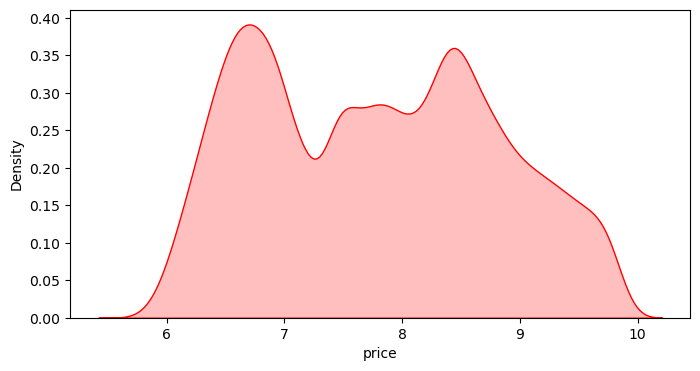

In [9]:
# vamos a ver visualmente como está distribuida la variable respuesta

plt.figure(figsize=(8, 4))
sns.distplot(df.price, hist=False, color="red", kde_kws={"shade": True, "linewidth": 1})


# Variables predictoras

In [10]:
# exploramos cuáles son los principales estadísticos de las variables numéricas

df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


- Longitud, Ancho y Altura no tiene sentido que tenga de valor 0 pues no existiría, procedemos a quitarlos 


In [11]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
1249,2.25,Premium,I,SI1,61.3,58.0,8.52,8.42,0.0,9.642
3185,1.20,Premium,D,VVS1,62.1,59.0,0.00,0.00,0.0,9.661
4057,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,7.664
4401,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,8.215
7910,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,8.545
8174,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,8.252
8820,2.25,Premium,H,SI2,62.8,59.0,0.00,0.00,0.0,9.800
10669,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,8.462
10881,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,8.061


In [12]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])


17

In [13]:
#nos quedamos con los datos que sean diferente a 0 

df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]


In [14]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,


In [15]:
# ahora si tenemos nuestras medidas mejor ajustadas 

df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40438.0,0.797276,0.475643,0.200,0.400,0.700,1.04,5.010
depth,40438.0,61.746288,1.436631,43.000,61.000,61.800,62.50,79.000
table,40438.0,57.451464,2.234446,44.000,56.000,57.000,59.00,95.000
x,40438.0,5.729696,1.122480,3.730,4.710,5.690,6.54,10.740
y,40438.0,5.733281,1.152485,3.680,4.720,5.700,6.54,58.900
z,40438.0,3.538838,0.707442,1.070,2.910,3.520,4.03,31.800
price,40438.0,7.783371,1.016666,5.787,6.851,7.779,8.58,9.842


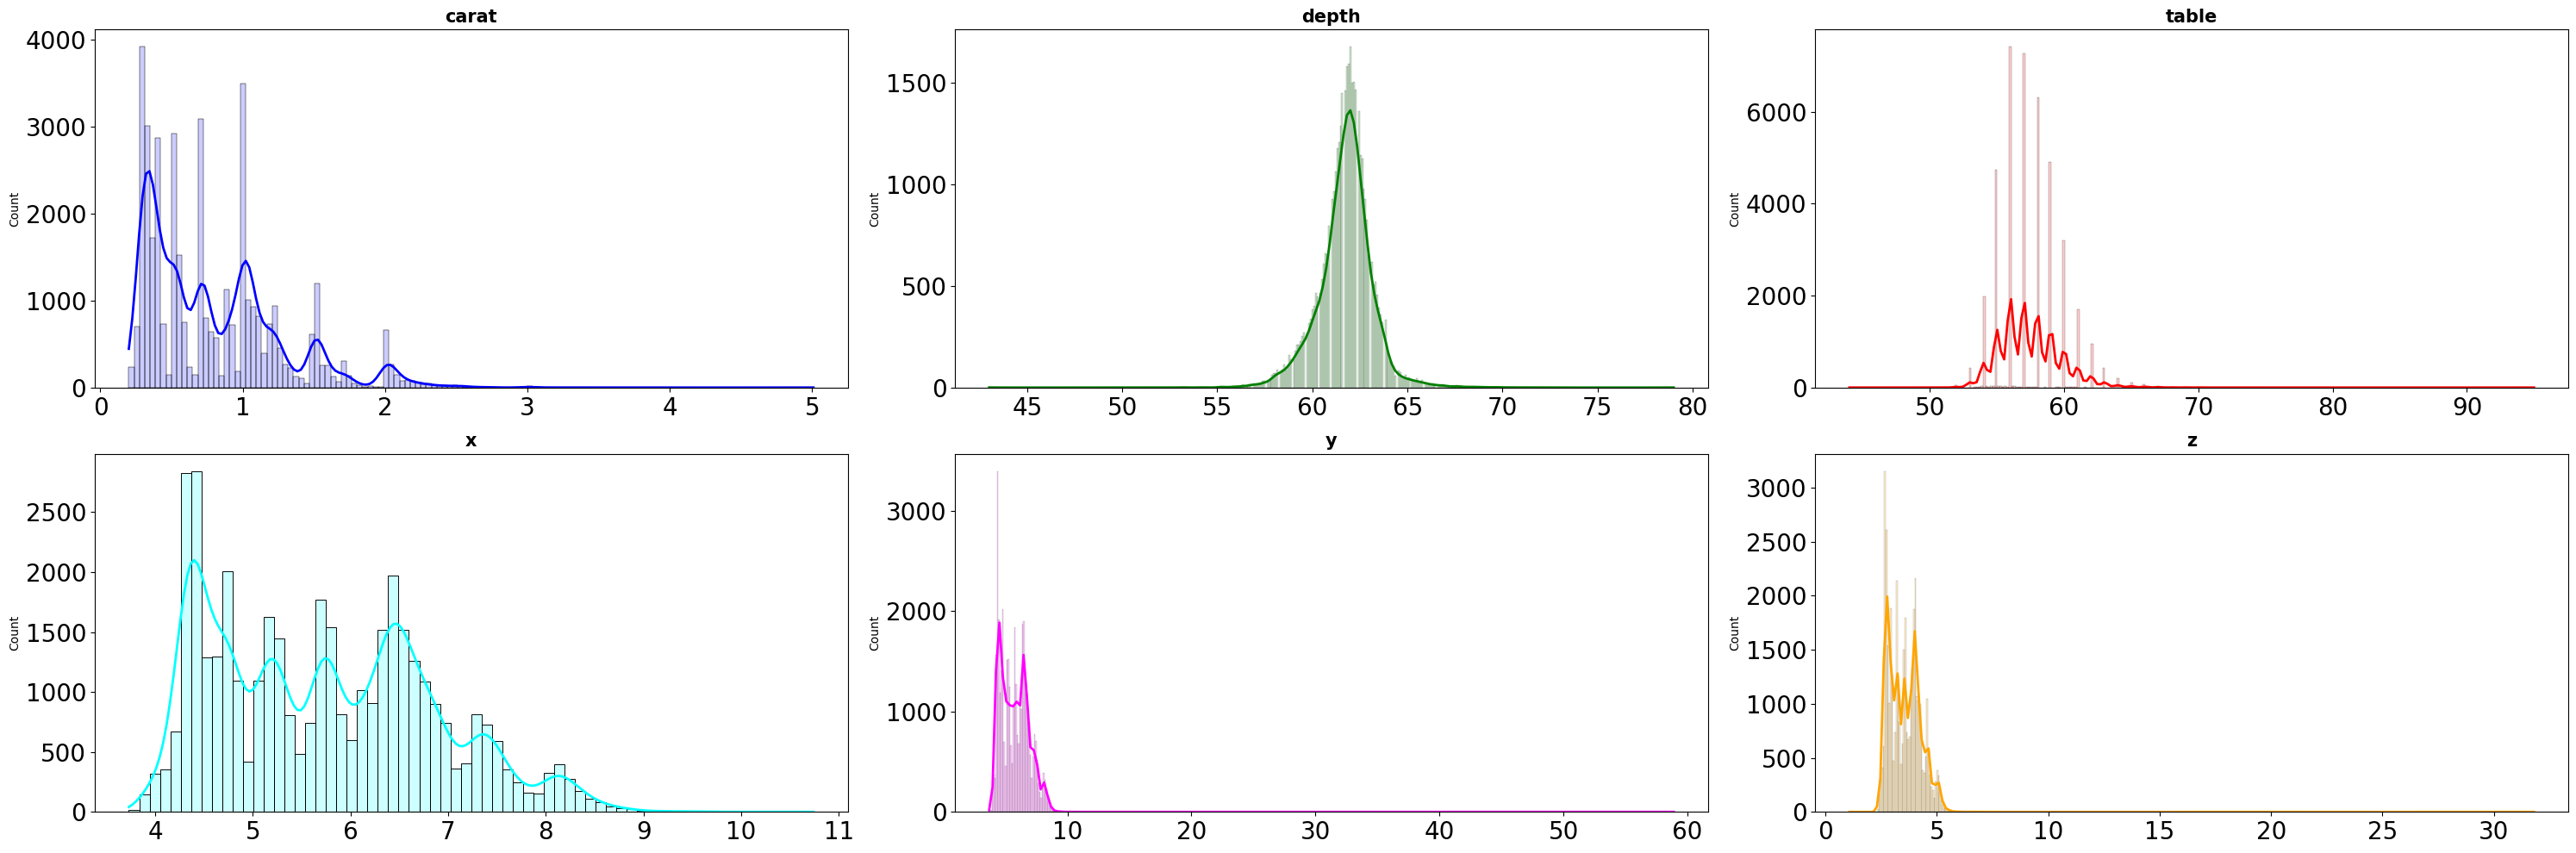

In [16]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();
    

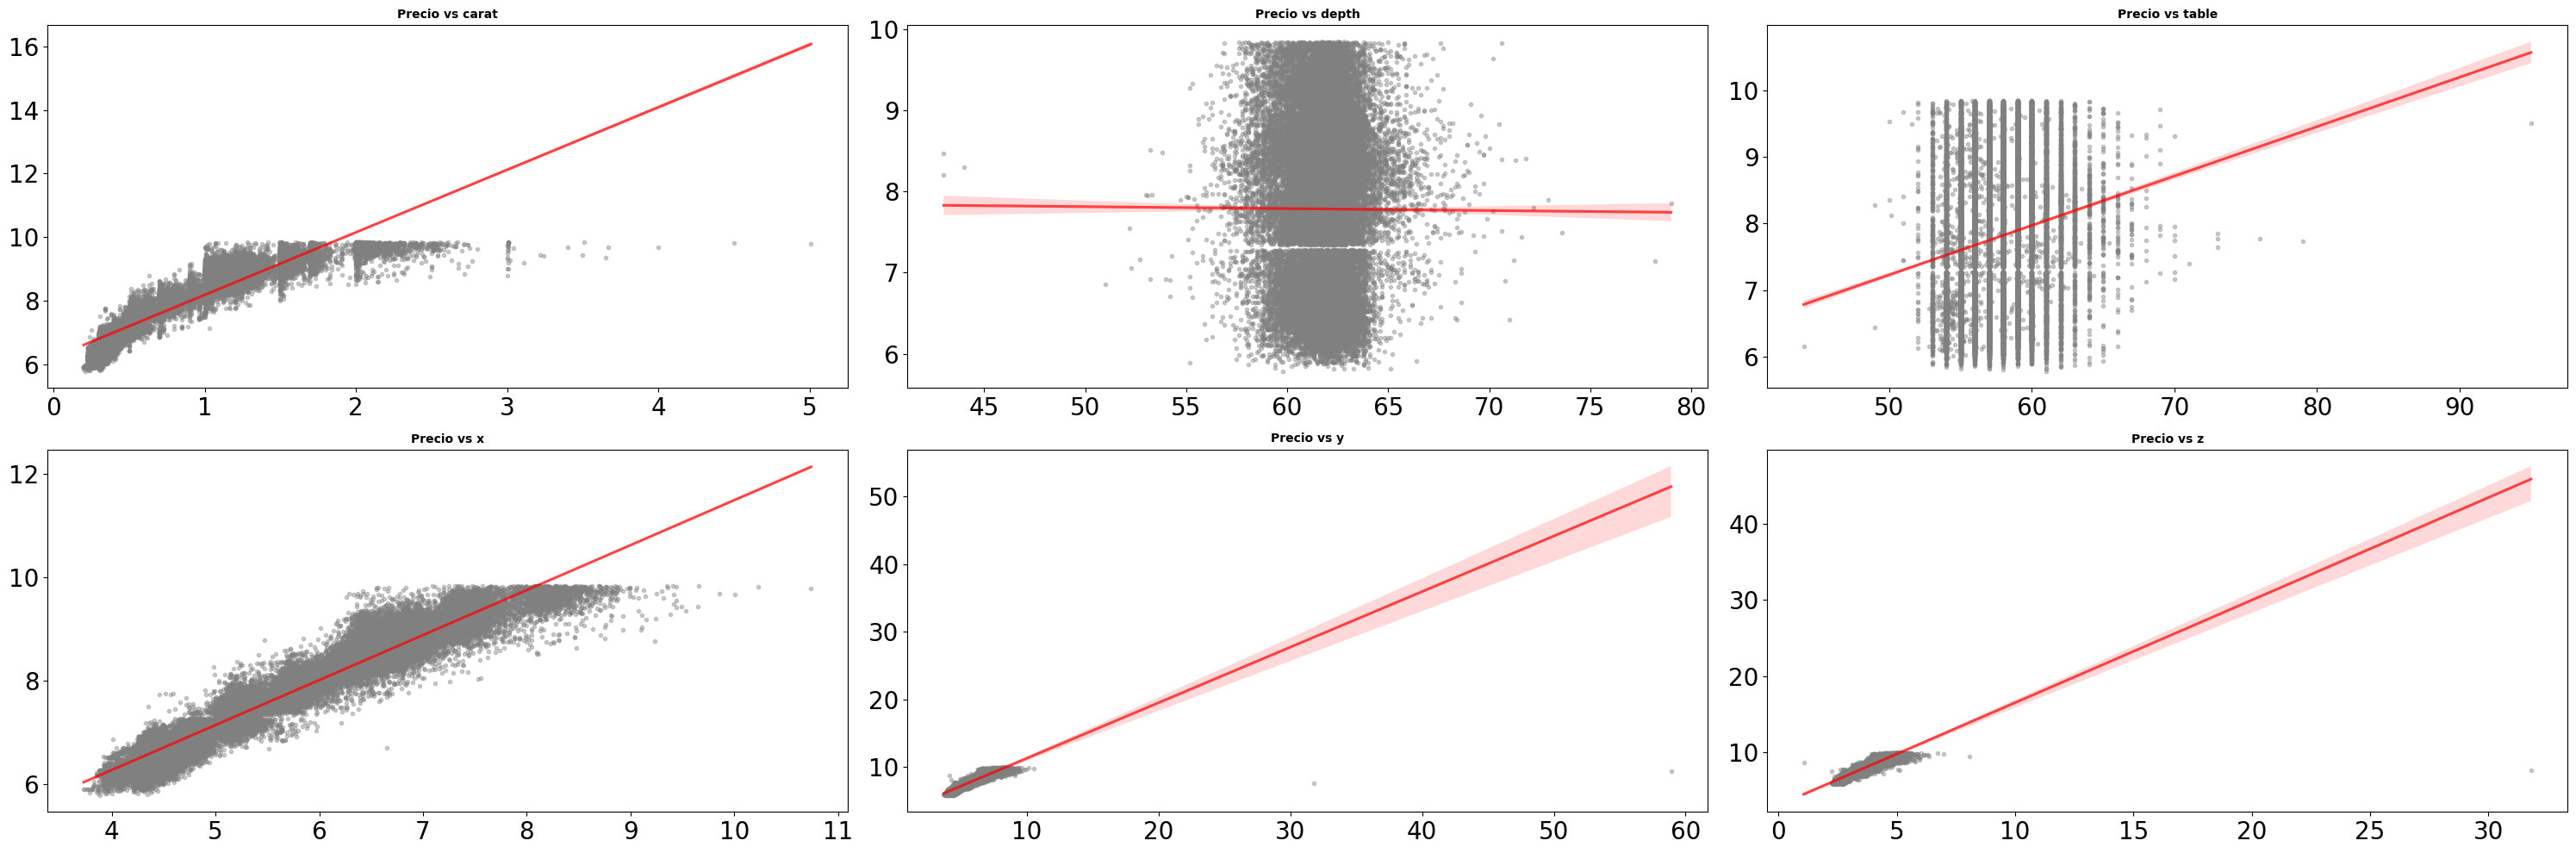

In [17]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

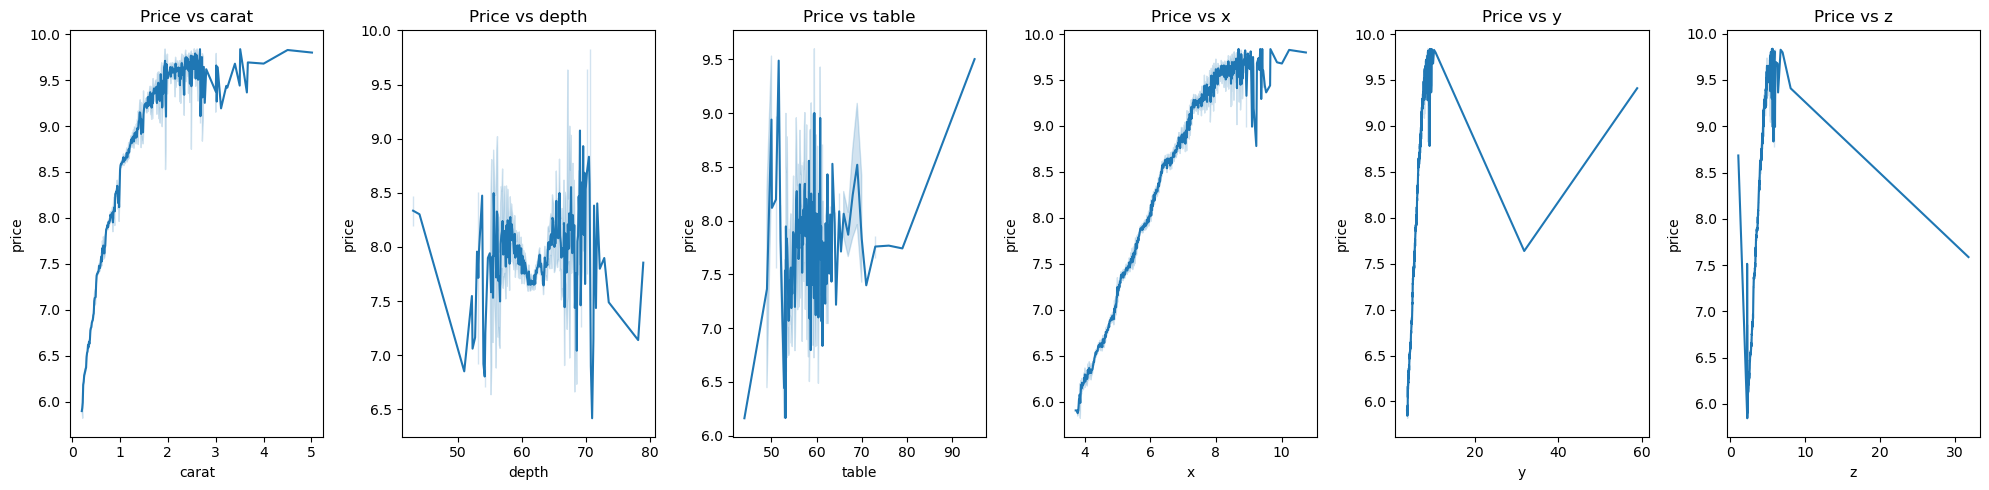

In [18]:
fig, axs = plt.subplots(ncols=6, figsize=(20, 5))
for i in range(len(columnas_numeric)):
  col = columnas_numeric[i]
  ax = axs[i]
  ax.set_title(f'Price vs {col}')
  sns.lineplot(data=df, x=col.lower(), y='price', ax=ax)
fig.tight_layout()

 # Correlación entre variables numéricas

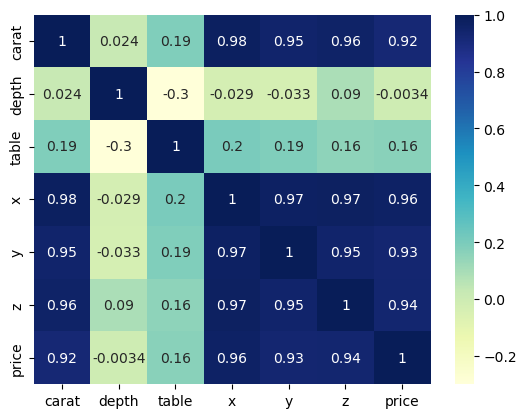

In [19]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

In [20]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

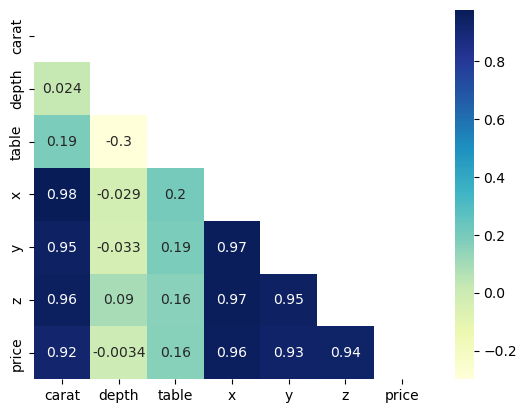

In [21]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

- Los quilates están altamente relacionados con las variables "x""y""z", esto puede deberse a que los quilates es la unidad de peso de un diamante y esto es una consecuencia de sus dimensiones : 


- En el caso específico de los diamantes, su peso se mide en quilates (ct), y un quilate equivale a 0.2 gramos. El peso de un diamante se puede calcular a partir de su ancho, longitud y profundidad.

- Sería recomendable quitar estas dimensiones dejando solo el peso (quilates)

In [22]:
df.head(1)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.3,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353


In [23]:
df.drop(columns=['x', 'y', 'z','depth','table'], axis=1, inplace=True)

In [24]:
df.head(2)

,carat,cut,color,clarity,price
id,,,,,
0,0.30,Premium,D,SI2,6.353
1,1.01,Ideal,E,VVS2,9.183


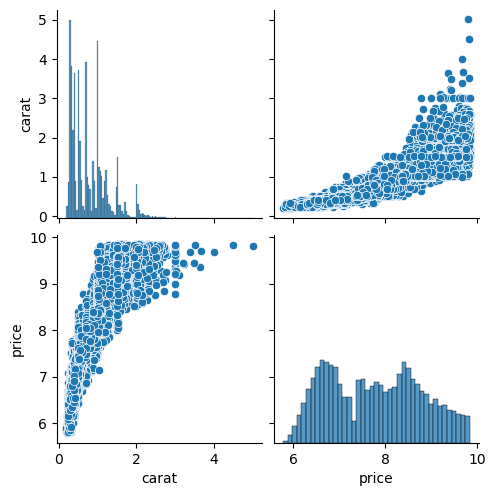

In [25]:
sns.pairplot(data=df)

# Variables categóricas

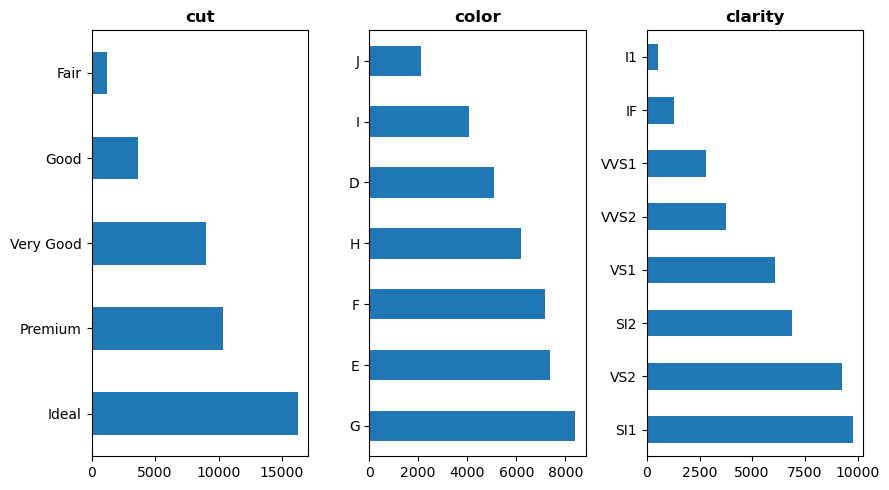

In [26]:
# Gráfico para cada variable cualitativa
# ==============================================================================

fig, axes = plt.subplots(1, 3, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

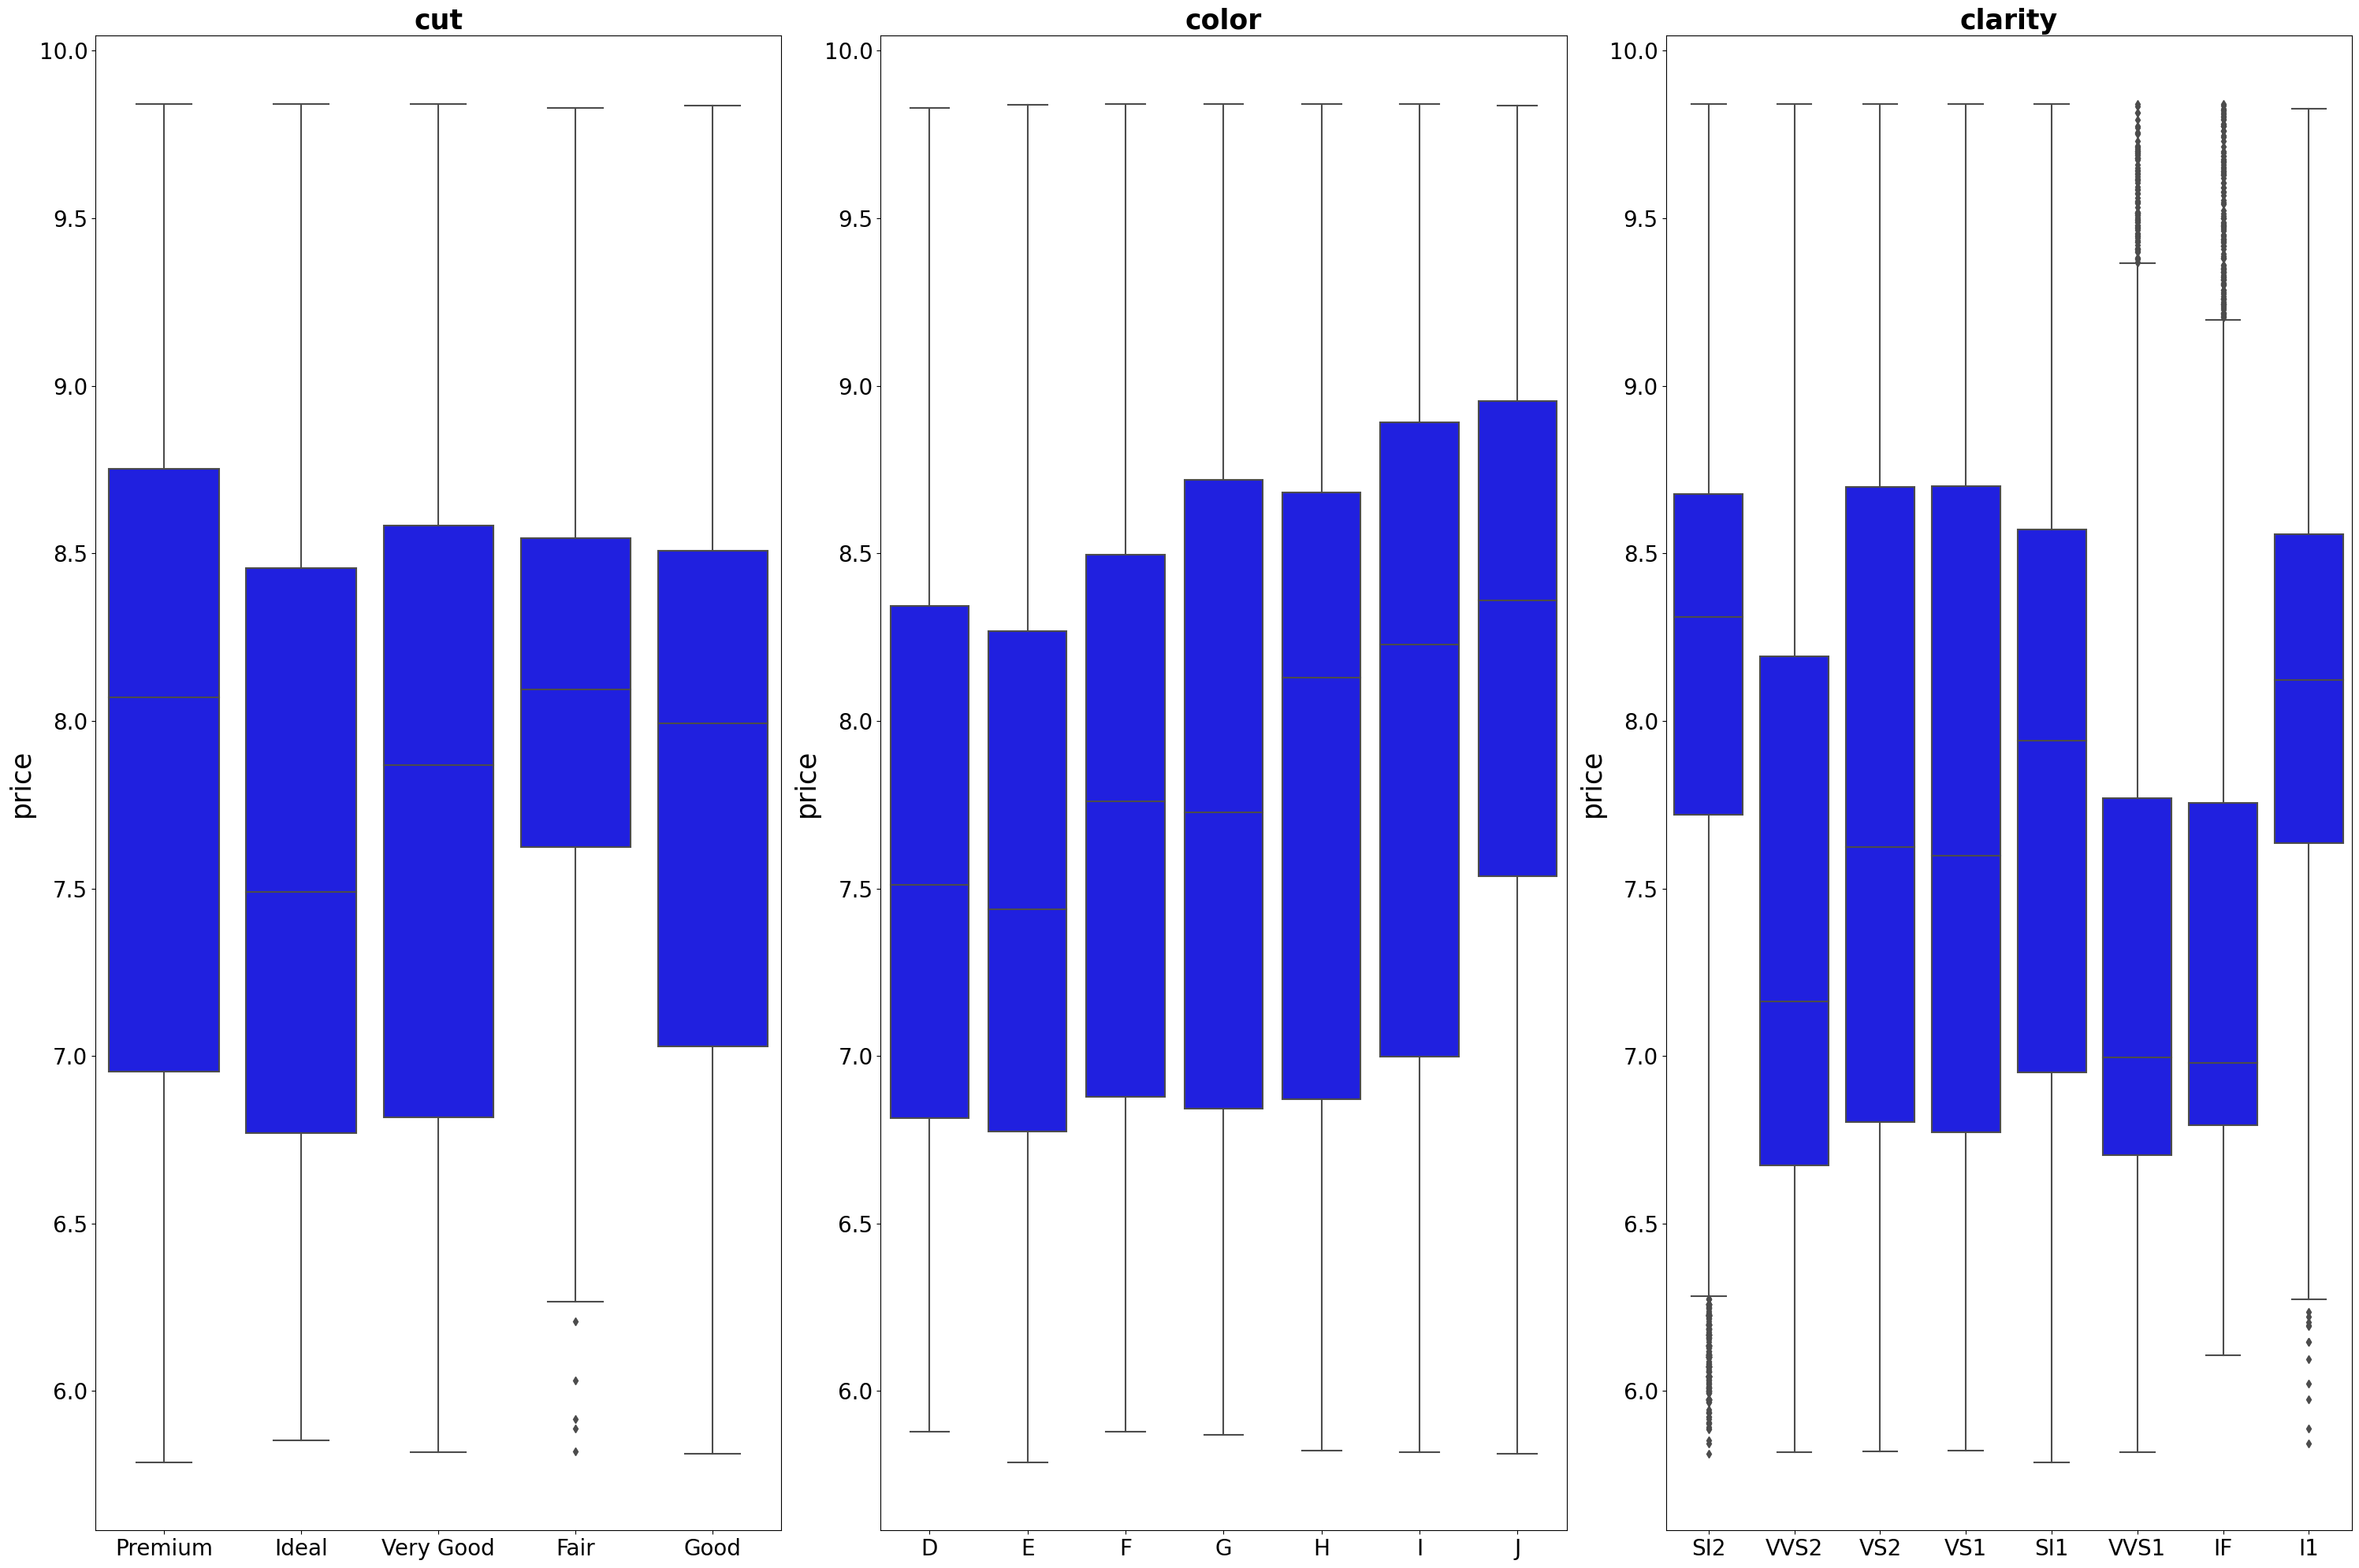

In [27]:
fig, axes = plt.subplots( nrows = 1, ncols = 4,figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "price",
        color = "blue", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "price", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

- podemos ver que cuanto menor sea la calidad del corte, mayor será el número de valores atípicos,ya que es consecuente que los precios seanlos más bajos  

- En clarity IF, VVS1 y VVS2 tienen una gran cantidad de valores atípicos, pero tiene sentido ya que segun la siguiente tabla la claridad es importante para el precio final

In [28]:
df_categoricas= df.select_dtypes(include= "object")
df_categoricas.head()

,cut,color,clarity
id,,,
0,Premium,D,SI2
1,Ideal,E,VVS2
2,Ideal,F,VS2
3,Very Good,G,SI2
4,Premium,G,VS1


# Gráficos de relaciones de nuestras variables con la variable respuesta


In [29]:
def graph_rel(df, column, column_compared):
    df_rel = df.groupby([column])[column_compared].mean().reset_index()
    plt.figure(figsize=(5, 4))
    sns.barplot(data=df_rel, x=column, y=column_compared, order=df_rel.sort_values(column_compared)[column]).set(title="Average " + column_compared + " by " + column, xlabel=column, ylabel="Average " + column_compared)


In [30]:
# creamos una función que nos sirva para comparar diferentes variables entre sí y luego que nos muestre un gráfico 

def graph_rel_a(df, column, column_compared):
    df_rel=df.groupby([column])[column_compared].mean().reset_index()
    plt.figure(figsize=(6, 3))
    sns.barplot(data=df_rel, x=column, y=column_compared)

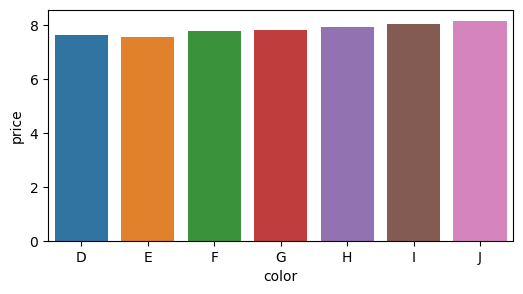

In [31]:
graph_rel_a(df,"color","price")


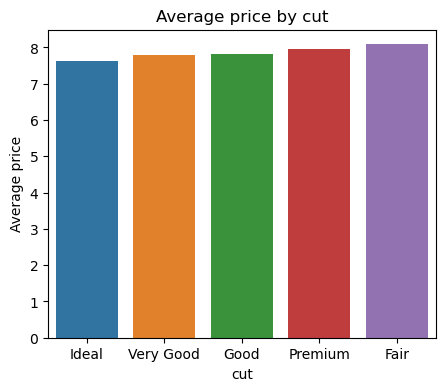

In [32]:
graph_rel(df,"cut","price")


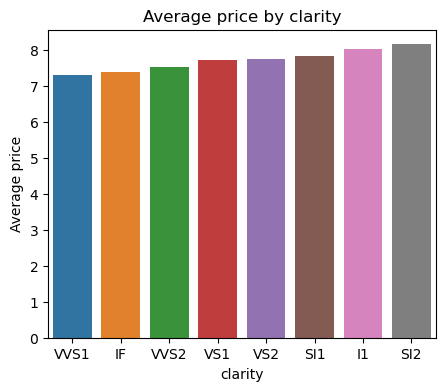

In [33]:
graph_rel(df,"clarity","price")



- Observamos que el corte,el color y la claridad influyen en el precio , no de una manera muy notoria pero si se ve una escala de menor a mayor

# PREPROCESADO

## Gestión de outliers


In [34]:
df_num= df.select_dtypes(include=np.number)

In [35]:
#df_num= df_num.drop(["price"], axis=1)

In [36]:
df_num.head(1)

,carat,price
id,,
0,0.3,6.353


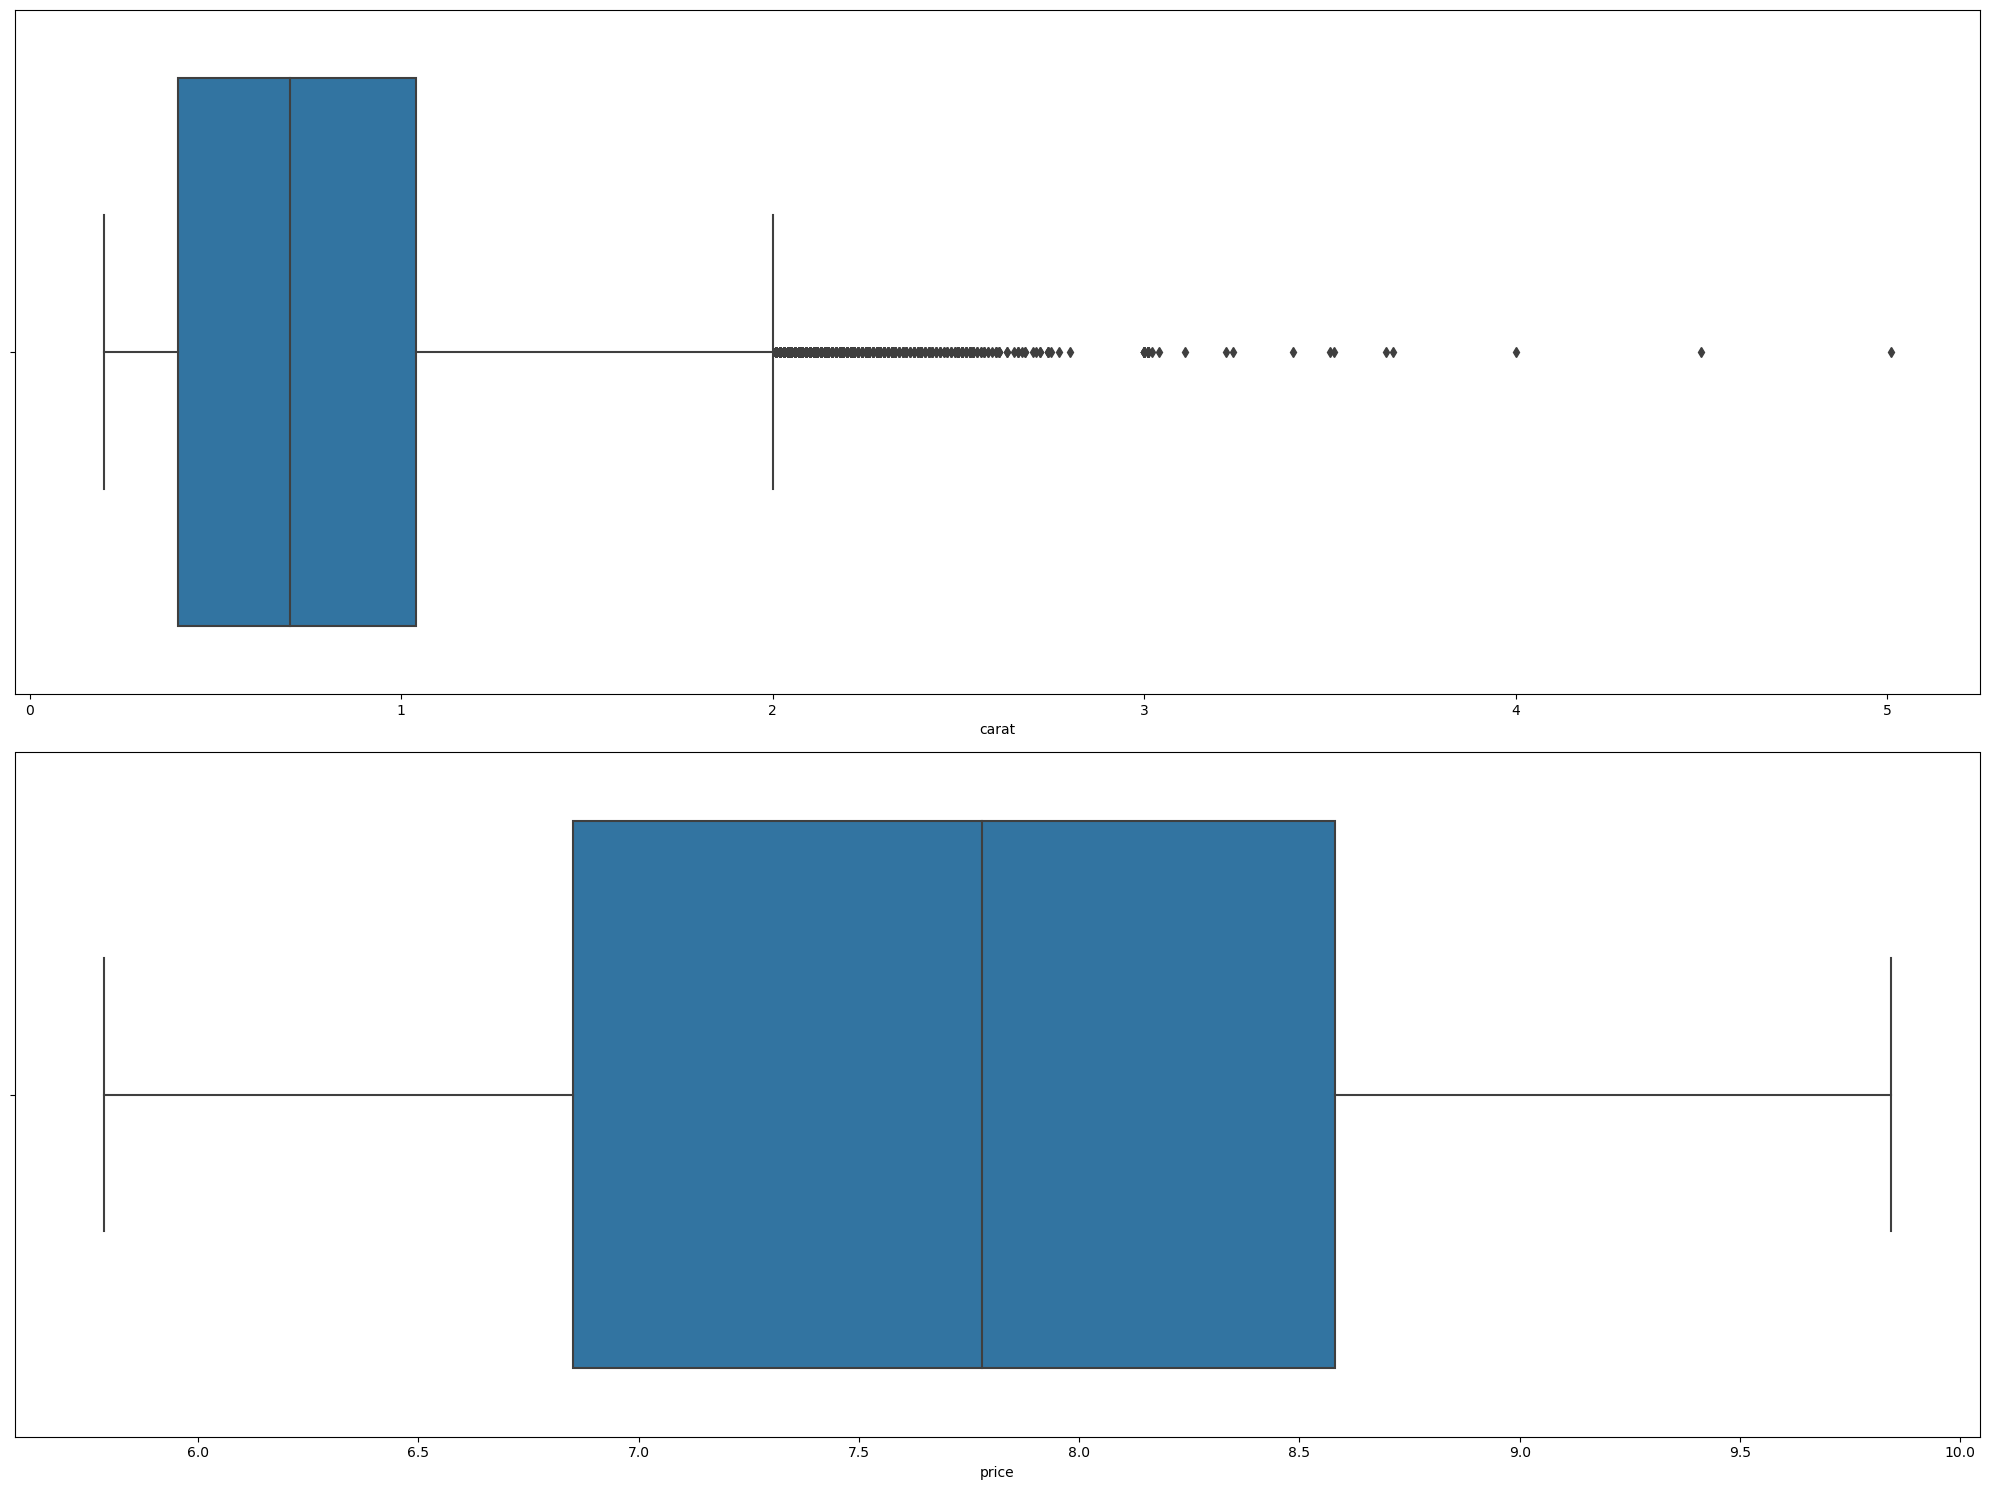

In [37]:
fig,axes= plt.subplots(nrows=2, ncols= 1, figsize=(20,15))
for i, columna in enumerate(df_num.columns):
    sns.boxplot(data=df_num,
               x=columna,
               ax=axes[i])
plt.tight_layout()

- En carat es normal que hayan outliers porque diamantes de 5 quilates son muy raros y a su vez tienen un mayor precio
- Los valores atípicos son normales , pueden haber piezas con más quilates. En este caso no los quitaremos porque en nuestro df_test que  son los datos que tenemos que predecir existen esos datos. 

In [38]:
df_num.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40438.0,0.797276,0.475643,0.200,0.400,0.700,1.04,5.010
price,40438.0,7.783371,1.016666,5.787,6.851,7.779,8.58,9.842


Los valores atípicos son normales (tal vez sean piezas reales o algo raro), pero no podemos dejar que afecten negativamente a nuestro modelo. por lo menos debemos quitar lo más lejos de ellos.

In [39]:
def deteccion_outliers(lista_columnas, df):
    
    dicc_indices={}
    for i in lista_columnas:
        
        Q1 = np.nanpercentile(df[i], 25)
        Q3 = np.nanpercentile(df[i], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1

        # calculamos los límites
        outlier_step = 1.5 * IQR
        outliers_data = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)]

        if outliers_data.shape[0]>0:
            dicc_indices[i]= outliers_data.index
        else:
            pass
    return dicc_indices

In [40]:
lista_columnas = df_num.columns
lista_columnas

Index(['carat', 'price'], dtype='object')

In [41]:
ind=deteccion_outliers(lista_columnas, df)

In [42]:
len(ind)

1

In [43]:
print(ind)


{'carat': Int64Index([   40,    85,   130,   173,   244,   264,   274,   289,   292,
              295,
            ...
            40040, 40052, 40060, 40067, 40079, 40101, 40193, 40304, 40408,
            40424],
           dtype='int64', name='id', length=1444)}


In [44]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
#for k, v in ind.items():
    #mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    #for i in v: # iteremos por la lista de valores para cada columna
        #df.loc[i,k] = mediana 

# Estandarización

In [45]:
#scaler = StandardScaler()
#scaler.fit(df[['carat', 'depth', 'table', 'price']])
#X_escaladas = scaler.transform(df[['carat', 'depth', 'table', 'price']])
#df[['carat', 'depth', 'table', 'price']] = X_escaladas
#df.head()

In [46]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

#fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

#lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

#axes = axes.flat

#columnas_numeric = df.select_dtypes(include = np.number).columns

#for i, colum in enumerate(columnas_numeric): 
    #sns.histplot(
        #data = df,
        #x = colum,
        #kde = True, 
        #color = lista_colores[i], 
        #line_kws = {"linewidth": 2}, 
        #alpha = 0.2, 
        #ax = axes[i])
    
    
    #axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    #axes[i].tick_params(labelsize = 20)
    #axes[i].set_xlabel("")
    

#fig.tight_layout();


In [47]:
# guardamos el escaler en un pickle

#import pickle

#with open('data/estandarizacion.pkl', 'wb') as s:
    #pickle.dump(scaler, s)

# Codificacion de las variables categóricas

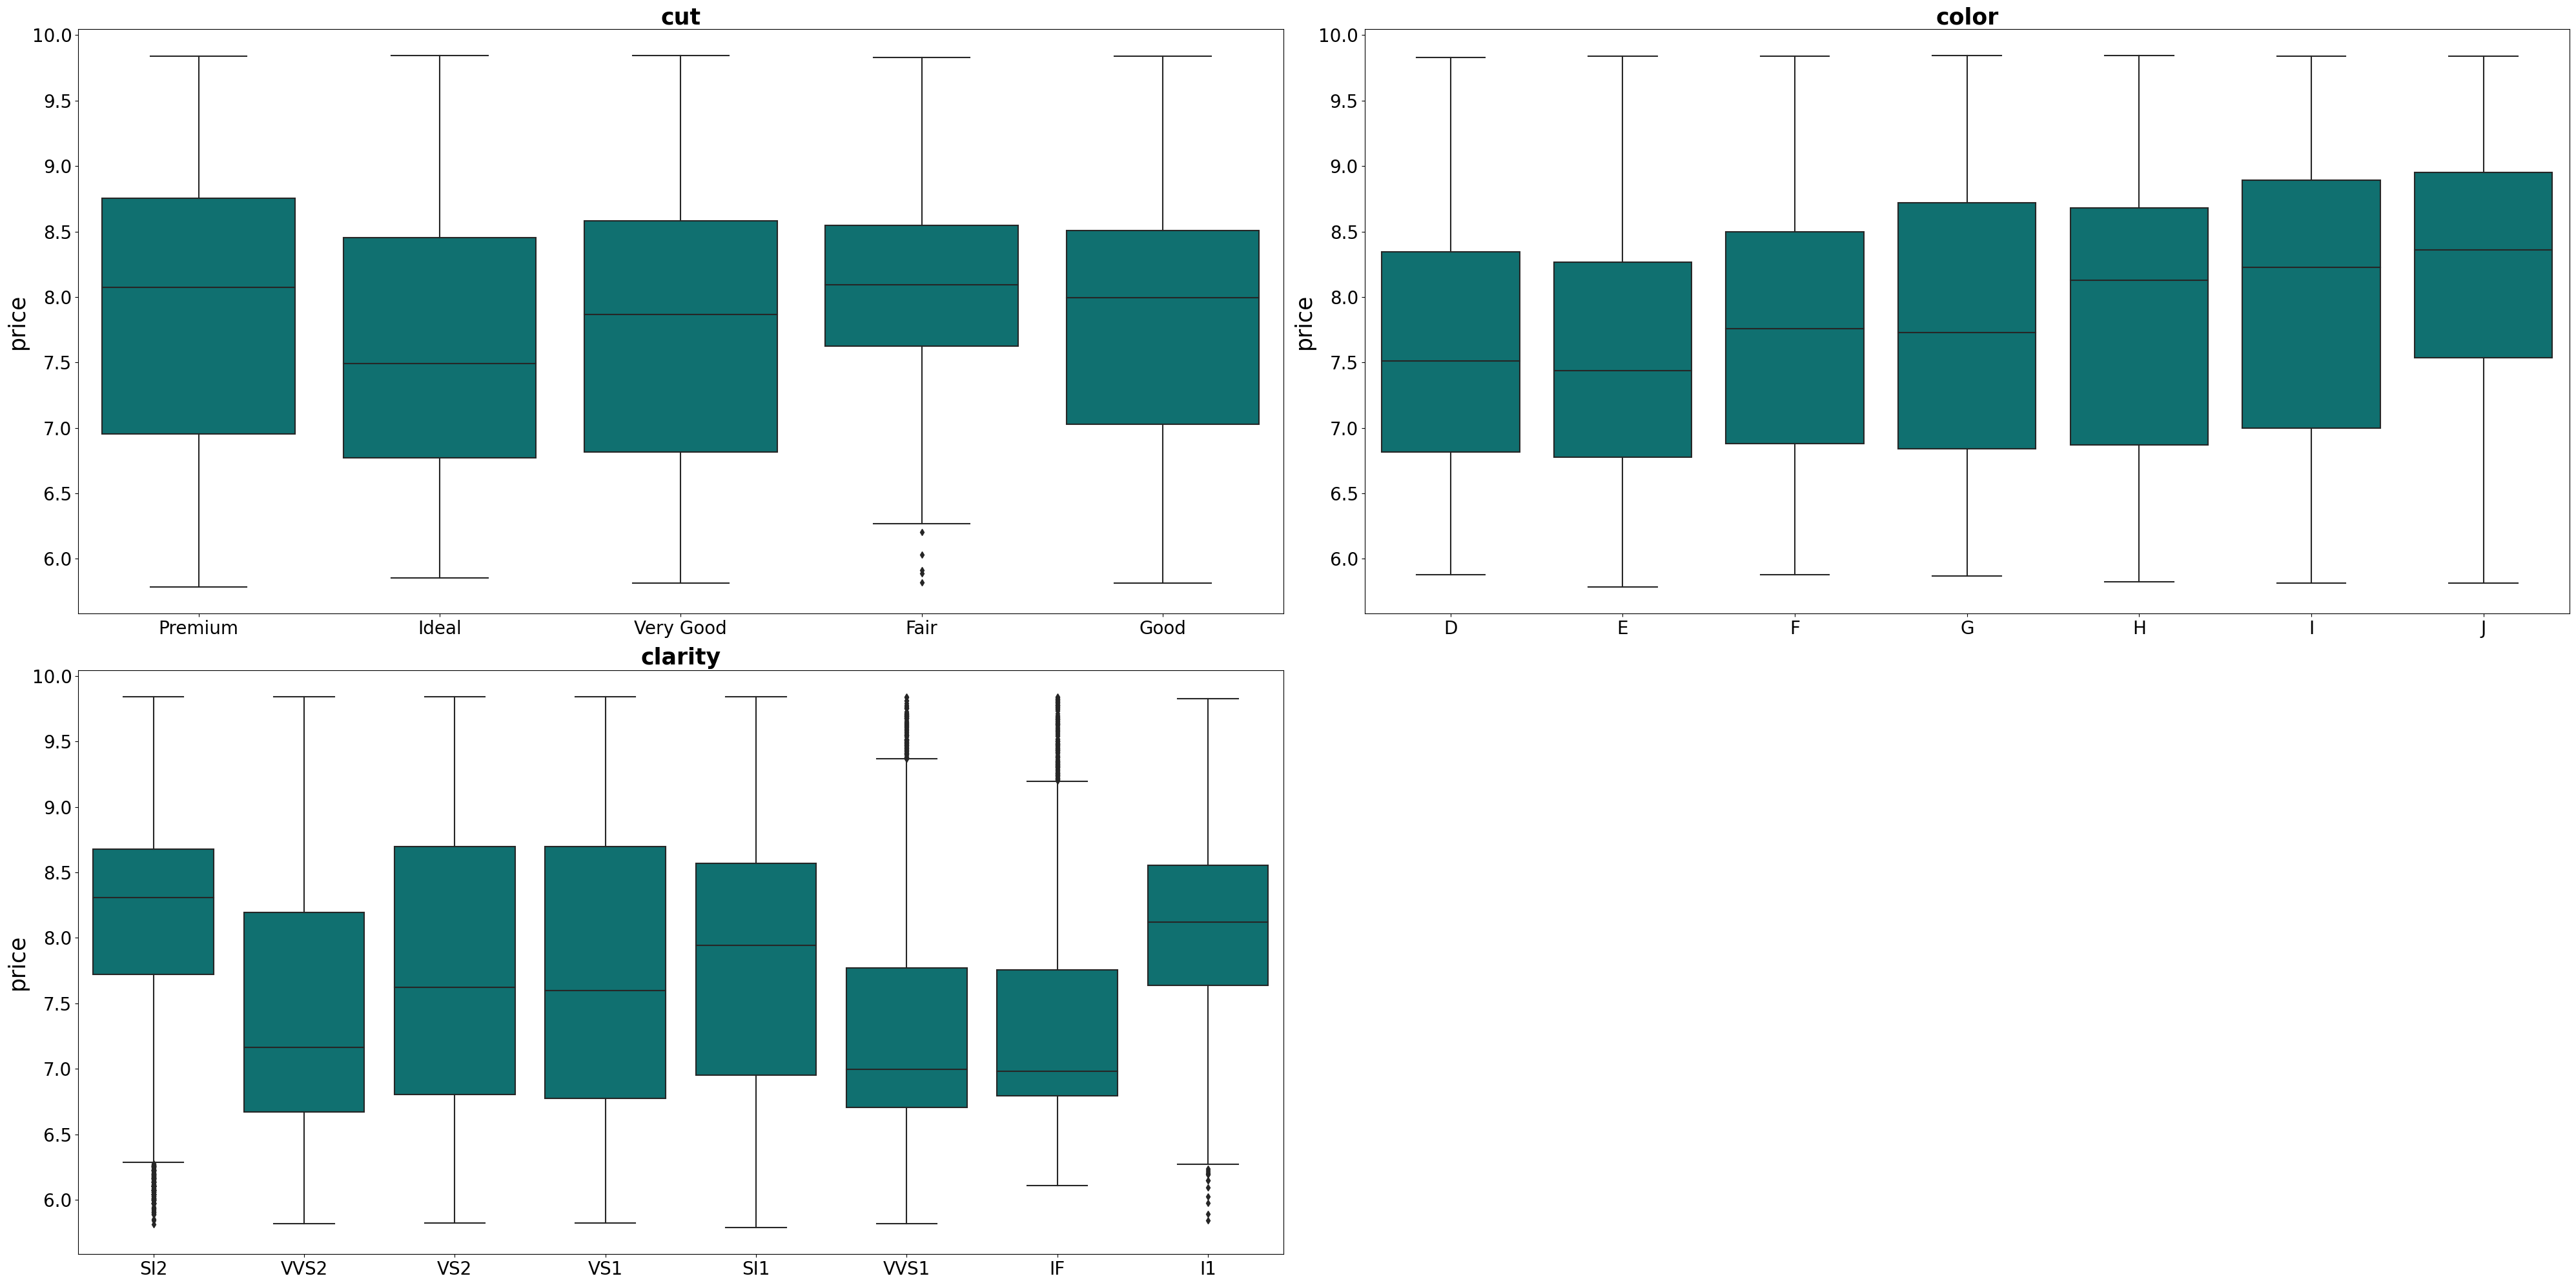

In [48]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "price",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "price", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

In [49]:
# Chequeamos valores únicos

print('CUT HAS ' , df['cut'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('COLOR HAS ', df['color'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('CLARITY HAS ', df['clarity'].unique(), 'categories')
print("---------------------------------------------------------------------------")

CUT HAS  ['Premium' 'Ideal' 'Very Good' 'Fair' 'Good'] categories
---------------------------------------------------------------------------
COLOR HAS  ['D' 'E' 'F' 'G' 'H' 'I' 'J'] categories
---------------------------------------------------------------------------
CLARITY HAS  ['SI2' 'VVS2' 'VS2' 'VS1' 'SI1' 'VVS1' 'IF' 'I1'] categories
---------------------------------------------------------------------------


Ideal
Premium
Very Good
Good
Fair

I1
SI1
SI2
VS1
VS2
VVS2
VVS1
IF



D es la calificación más alta y representa un diamante completamente incoloro

E y F también se consideran incoloros, pero tienen pequeñas trazas de color que solo se pueden detectar por un experto en diamantes

G, H e I tienen una ligera presencia de color amarillo o marrón que solo se puede detectar a simple vista por un experto en diamantes

J tiene una presencia de color más notoria que los grados anteriores.

J < I < H < G < F < E < D


In [50]:
# guardamos el escaler en un pickle

import pickle


In [51]:
orden_cut = ["Fair", "Good", "Very Good", "Premium","Ideal"] 
orden_clarity = ["I1", "SI1", "SI2","VS1","VS2","VVS2","VVS1","IF"]

In [52]:
orden_color= ["D","E","F","G","H","I","J"]

In [53]:
def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    
    with open(f'data/encoding{columna}.pkl', 'wb') as s:
        pickle.dump(ordinal, s)
    return df

In [54]:
def one_hot_encoder(dff, columnas):
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    with open(f'data/encoding{columnas[0]}.pkl', 'wb') as s:
        pickle.dump(oh, s)
    
    return dff

In [55]:
df.head()

,carat,cut,color,clarity,price
id,,,,,
0,0.30,Premium,D,SI2,6.353
1,1.01,Ideal,E,VVS2,9.183
2,0.72,Ideal,F,VS2,7.983
3,1.08,Very Good,G,SI2,8.371
4,0.36,Premium,G,VS1,6.588


In [56]:
df = ordinal_encoder(orden_cut, df, "cut")

In [57]:
df = ordinal_encoder(orden_clarity, df, "clarity")

In [58]:
df = ordinal_encoder(orden_color, df, "color")

In [60]:
df.head()

,carat,cut,color,clarity,price
id,,,,,
0,0.30,3,0,2,6.353
1,1.01,4,1,5,9.183
2,0.72,4,2,4,7.983
3,1.08,2,3,2,8.371
4,0.36,3,3,3,6.588


In [61]:
df.to_csv('data/df_train_mod.csv', index=False)

In [62]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
price      0
dtype: int64

# Preparamos nuestro test

In [63]:
df_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67


In [64]:
df_test.drop(columns=['x', 'y', 'z','depth','table'], axis=1, inplace=True)

In [65]:
df_test.head(1)

,carat,cut,color,clarity
id,,,,
0,0.32,Ideal,I,SI1


In [66]:
df_test= ordinal_encoder(orden_cut, df_test, "cut")
df_test = ordinal_encoder(orden_clarity, df_test, "clarity")
df_test = ordinal_encoder(orden_color, df_test, "color")

In [67]:
df_test.head(1)

,carat,cut,color,clarity
id,,,,
0,0.32,4,5,1


In [68]:
df_test.to_csv('data/df_test_mod.csv', index=False)